In [72]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [73]:
os.chdir("threat_images")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'threat_images'

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 9452-2BAA

 Directory of C:\Users\Hp\Desktop\BaggageAI_CV_Hiring_Assignment\threat_images

30-12-2021  17:16    <DIR>          .
30-12-2021  17:16    <DIR>          ..
30-09-2020  17:07             3,414 BAGGAGE_20170522_113049_80428_A.jpg
30-09-2020  17:07             4,130 BAGGAGE_20170522_115645_80428_B.jpg
30-09-2020  17:07             3,771 BAGGAGE_20170523_085803_80428_D.jpg
30-09-2020  17:07             9,648 BAGGAGE_20170523_094231_80428_B.jpg
30-09-2020  17:08             6,449 BAGGAGE_20170524_075554_80428_B.jpg
30-12-2021  17:16            89,908 BAGGAGE_20180811_175323_83216_B_1.jpg
30-12-2021  16:15             6,905 contours_none_image1.jpg
30-12-2021  15:42             4,335 image_thres1.jpg
30-12-2021  17:13             4,751 img_3.jpg
               9 File(s)        133,311 bytes
               2 Dir(s)  140,263,305,216 bytes free


In [5]:
img = cv.imread("BAGGAGE_20170522_113049_80428_A.jpg",1)

In [6]:
cv.imshow("Image", img)
p = cv.waitKey()
if p == ord("s"):
    cv.destroyAllWindows()

In [7]:
img_1 = cv.GaussianBlur(img, ksize = (7,7), sigmaX = 0)

In [8]:
cv.imshow("Image1", img_1)
p = cv.waitKey()
if p == ord("s"):
    cv.destroyAllWindows()

In [9]:
edges = cv.Canny(image = img_1, threshold1 =127, threshold2=127)

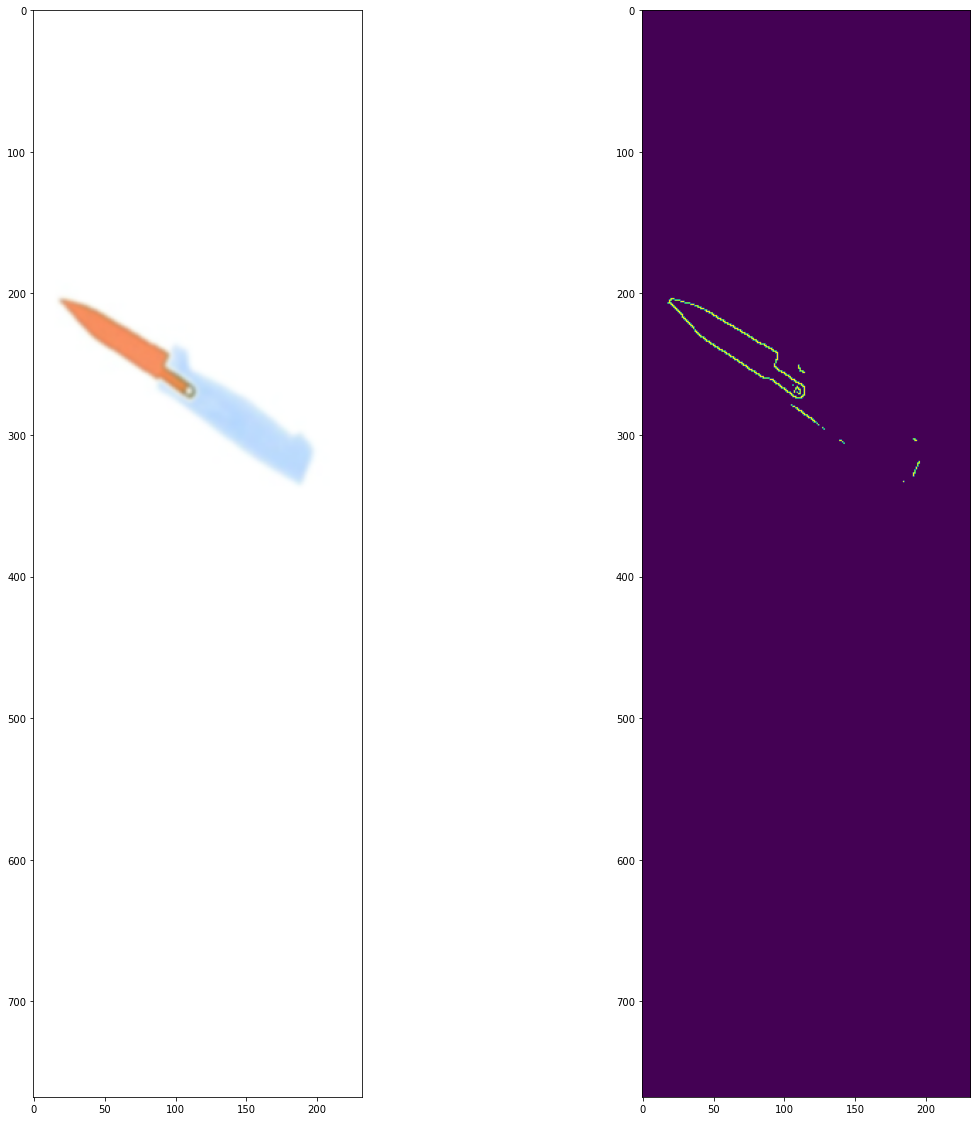

In [10]:
plt.figure(figsize = (20, 20))
plt.subplot(1,2,1);
plt.imshow(img_1)
plt.subplot(1,2,2);
plt.imshow(edges)


In [11]:
img_2 = img_1[200:350, 20:120]

In [12]:
cv.imshow("Image2", img_2)
p = cv.waitKey()
if p == ord("s"):
    cv.destroyAllWindows()

In [13]:
img_gray = cv.cvtColor(img_1, cv.COLOR_BGR2GRAY)

In [14]:

cv.imshow("Image2", img_gray)
p = cv.waitKey()
if p == ord("s"):
    cv.destroyAllWindows()

In [15]:
ret, thresh = cv.threshold(img_gray, 150, 255, cv.THRESH_BINARY)

In [16]:
cv.imshow('Binary image', thresh)
cv.waitKey(0)
cv.imwrite('image_thres1.jpg', thresh)
cv.destroyAllWindows()


In [17]:
img_bin = cv.imread("image_thresh1.jpg")

In [18]:
contours, hierarchy = cv.findContours(image=img_bin, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
# draw contours on the original image
contours = sorted(contours, key = cv.contourArea, reverse = True)
image_copy = img.copy()
cv.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255,0,0), thickness=2)
# see the results
cv.imshow('None approximation', image_copy)
cv.waitKey(0)
cv.imwrite('contours_none_image1.jpg', image_copy)
cv.destroyAllWindows()


In [19]:
im = cv.imread('BAGGAGE_20170522_113049_80428_A.jpg')
imCopy = im.copy()
imgray=cv.cvtColor(im,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(imgray,127,255,0)
contours, hierarchy =  cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(imCopy,contours,-1,(0,255,0))
cv.imshow('draw contours',imCopy)
cv.waitKey(0)

115

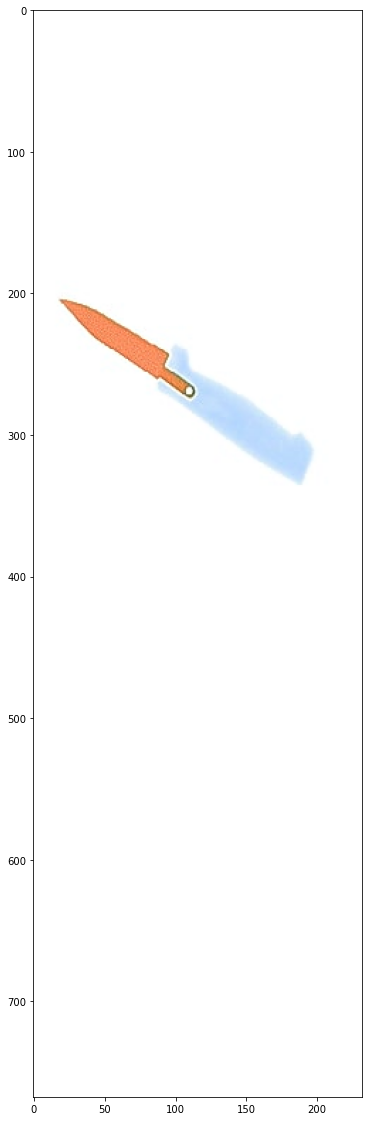

In [20]:
plt.figure(figsize = (20, 20))
plt.imshow(img)

In [46]:
img_2 = img[200:350, 20:220]

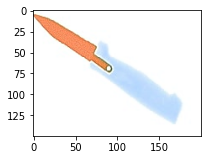

In [47]:
plt.figure(figsize =(3,3))
plt.imshow(img_2)

In [48]:
cv.imshow("Image", img_2)
cv.waitKey(0)
cv.destroyAllWindows()

In [49]:
cv.imwrite("img_3.jpg", img_2)

True

In [50]:
img_4 = cv.imread("img_3.jpg")
img_4 = cv.cvtColor(img_4, cv.COLOR_BGR2RGB)
img_4.shape

(150, 200, 3)

In [77]:
cv.imshow("Image", img_4)
cv.waitKey(0)
cv.destroyAllWindows()

In [52]:
img_5 = cv.imread("BAGGAGE_20180811_175323_83216_B_1.jpg")

In [53]:
cv.imshow("Image", img_5)
cv.waitKey(0)
cv.destroyAllWindows()

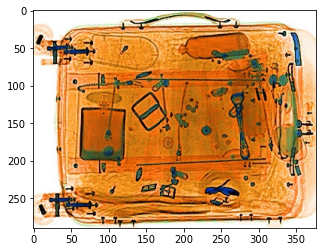

In [54]:
img_5 = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
plt.imshow(img_5)

In [55]:
roi = img_5[140:300, 130:330]

roi.shape

(150, 200, 3)

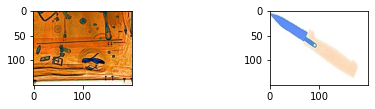

In [56]:
plt.figure(figsize = (6,6))
plt.subplot(1,3,1);plt.imshow(roi)
plt.subplot(1,3,3);plt.imshow(img_4)

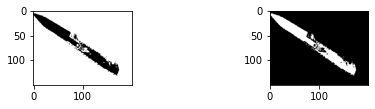

In [57]:
img_gray = cv.cvtColor(img_4, cv.COLOR_RGB2GRAY)

_, mask = cv.threshold(img_gray, 254/2+100, 255, cv.THRESH_BINARY)

mask_inv = cv.bitwise_not(mask)

plt.figure(figsize = (6,6))

plt.subplot(1,3,1);plt.imshow(mask, cmap = 'gray')
plt.subplot(1,3,3);plt.imshow(mask_inv, cmap = 'gray')

In [58]:
print(mask.shape)
print(roi.shape)


(150, 200)
(150, 200, 3)


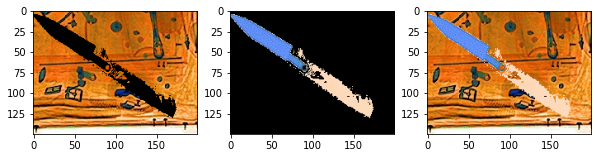

In [59]:
img_bg = cv.bitwise_and(roi, roi, mask = mask)
img_fg = cv.bitwise_and(img_4, img_4, mask = mask_inv)
dst = cv.add(img_fg, img_bg)

plt.figure(figsize = (10,6))
plt.subplot(1,3,1);plt.imshow(img_bg)
plt.subplot(1,3,2);plt.imshow(img_fg)
plt.subplot(1,3,3);plt.imshow(dst)

In [79]:
img_5[140:300, 130:330] = dst
img_5 = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
cv.imshow("Image",img_5)
cv.waitKey(0)
cv.destroyAllWindows()

In [75]:
cv.imwrite("threat_output.jpg", img_5)

True

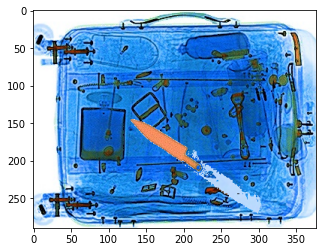

In [81]:
plt.imshow(img_5)